# Homework2: Normalizing flows and VAE

## Task 1: Theory (5pt)

### Problem 1: IWAE theory (2pt)

Variational inference is based on the ELBO objective:
$$
    \mathcal{L} (\boldsymbol{\phi}, \boldsymbol{\theta})  = \mathbb{E}_{\mathbf{z} \sim q(\mathbf{z} | \mathbf{x})} \log \left( \frac{p(\mathbf{x}, \mathbf{z} | \boldsymbol{\theta})}{q(\mathbf{z}| \mathbf{x}, \boldsymbol{\phi})} \right) \rightarrow \max_{\boldsymbol{\phi}, \boldsymbol{\theta}}.
$$
ELBO is a lower bound of the log-likelihood. However if the gap between ELBO and log-likelihood is large, then our model is not optimal. In this task we discuss the way, how to improve the lower bound.

The improvement was introduced in the [IWAE](https://arxiv.org/abs/1509.00519) model. This model introduces the improved version of the variational lower bound (ELBO):

$$
    \mathcal{L}_K (\boldsymbol{\phi}, \boldsymbol{\theta}) = \mathbb{E}_{\mathbf{z}_1, \dots, \mathbf{z}_K \sim q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi})} \log \left( \frac{1}{K}\sum_{k=1}^K\frac{p(\mathbf{x}, \mathbf{z}_k | \boldsymbol{\theta})}{q(\mathbf{z}_k| \mathbf{x}, \boldsymbol{\phi})} \right) \rightarrow \max_{\boldsymbol{\phi}, \boldsymbol{\theta}}.
$$

Note, that the difference with the original ELBO is the sum over $K$ different latent vectors $\mathbf{z}_k$.

Moreover we can rewrite ELBO in the following form:

$$
    \mathcal{L} (\boldsymbol{\phi}, \boldsymbol{\theta}) = \frac{1}{K} \sum_{k=1}^K\mathcal{L} (\boldsymbol{\phi}, \boldsymbol{\theta}) = \frac{1}{K} \sum_{k=1}^K \mathbb{E}_{\mathbf{z}_k \sim q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi})} \log \left( \frac{p(\mathbf{x}, \mathbf{z}_k | \boldsymbol{\theta})}{q(\mathbf{z}_k| \mathbf{x}, \boldsymbol{\phi})} \right) = \frac{1}{K}  \mathbb{E}_{\mathbf{z}_k \sim q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi})} \sum_{k=1}^K \log \left( \frac{p(\mathbf{x}, \mathbf{z}_k | \boldsymbol{\theta})}{q(\mathbf{z}_k| \mathbf{x}, \boldsymbol{\phi})} \right).
$$
Here we see that the only difference between these two objectives ($\mathcal{L} (\boldsymbol{\phi}, \boldsymbol{\theta})$ and $\mathcal{L}_K (\boldsymbol{\phi}, \boldsymbol{\theta})$) is the order of sum and logarithm.

Our task here is two proof that the objective $\mathcal{L}_K (\boldsymbol{\phi}, \boldsymbol{\theta})$ is also a lower bound of log-likelihood and this lower bound is better than the initial ELBO.

We have to prove the following facts:

1. $\log p(\mathbf{x} | \boldsymbol{\theta}) \geq \mathcal{L}_K (\boldsymbol{\phi}, \boldsymbol{\theta}) \geq \mathcal{L}_M (\boldsymbol{\phi}, \boldsymbol{\theta}), \quad \text{for } K \geq M$;
2.  $\log p(\mathbf{x} | \boldsymbol{\theta}) = \lim_{K \rightarrow \infty} \mathcal{L}_K (\boldsymbol{\phi}, \boldsymbol{\theta})$ if $\frac{p(\mathbf{x}, \mathbf{z} | \boldsymbol{\theta})}{q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi})}$ is bounded.

**Hints:**
1. First part of the theorem.

    (a) Use the following equation inside the logarithm of $\mathcal{L}_K (q, \boldsymbol{\theta})$
$$
    \frac{a_1 + \dots + a_K}{K} = \mathbb{E}_{k_1, \dots, k_M} \frac{a_{k_1} + \dots + a_{k_M}}{M},
$$

Here $k_1, \dots, k_M$ are distinct indices sampled from $U[1, K]$.

    (b) Apply Jensen' inequality.
3. Second part of the theorem: use the Law of large numbers.


Let

$$
w( z)=\frac{p( x, z\mid\theta)}{q( z\mid  x,\phi)}.
$$

Then

$$
 L_K(\phi,\theta)
= {E}_{ z_{1:K}\sim q}
\left[\log\!\left(\frac{1}{K}\sum_{k=1}^K w( z_k)\right)\right],
\qquad
 L_1=  L.
$$

#### (1) Lower bound and monotonicity in $K$

**(a) $\log p( x\mid\theta)\ge  L_K$.**

Since $E_{q}[w(z)]= \int \frac{p( x, z\mid\theta)}{q( z\mid  x,\phi)}q( z\mid  x,\phi)dz = \int p( x, z\mid\theta)dz  =  p( x \mid \theta)$
,

$$
\log p( x\mid\theta)
= \log  E_{ z_{1:K}\sim q}\!\left[\frac{1}{K}\sum_{k=1}^K w( z_k)\right]
\ge  E_{ z_{1:K}\sim q}\!
\left[\log\!\left(\frac{1}{K}\sum_{k=1}^K w( z_k)\right)\right]
=  L_K,
$$

by Jensen’s inequality (log is concave).

**(b) $ L_K \ge  L_M$ for $K\ge M$.**

$$
L_K = E_{ z_{1:K}\sim q}
\left[\log\!\left(\frac{1}{K}\sum_{k=1}^K w( z_k)\right)\right] = 
E_{ z_{1:K}\sim q}\!
\left[\log\!\left(
    E_{ k_{1:M}\sim U[1,K]}
    \frac{1}{M}\sum_{i=1}^M w( z_{k_i})
    \right)\right]\ge\\

E_{ z_{1:K}\sim q}\!
E_{ k_{1:M}\sim U[1,K]}\log\!\left(
    \frac{1}{M}\sum_{i=1}^M w( z_{k_i})
    \right) = 
E_{ z_{1:K}\sim q, k_{1:M}\sim U[1,K]}\log\!\left(
    \frac{1}{M}\sum_{i=1}^M w( z_{k_i})
    \right) = 
E_{ z_{1:M}\sim q}\!
\left[\log\!\left(\frac{1}{M}\sum_{k=1}^M w( z_k)\right)\right] = L_M

$$

Therefore,

$$
\log p( x\mid\theta)\;\ge\; L_K\;\ge\; L_M
\quad\text{for } K\ge M.
$$

#### (2) Limit as $K\to\infty$

If $w( z)$ is bounded, the Law of Large Numbers gives

$$
\lim_{K \rightarrow \infty}\frac{1}{K}\sum_{k=1}^K w( z_k)\rightarrow
 E_q[w( z)]=p( x\mid\theta).
$$

$$
Y_K = \frac{1}{K}\sum_{k=1}^K w( z_k)
$$

$Y_K$ is bounded so we can apply dominated convergence theorem

$$
\lim_{K \rightarrow \infty} E\log Y_K = E\lim_{K \rightarrow \infty}\log Y_K = \log p(x\mid\theta)
$$



### Problem 2: Gaussian VAE (1pt)

Suppose that we have a random variable $x \in \mathbb{R}$ and a latent variable $z \in \mathbb{R}$ such that
$$
    x \sim \pi(x) = \mathcal{N}(\mu, 1), \quad z \sim p(z) = \mathcal{N}(0, 1).
$$

Let consider trivial VAE model with the following encoder $q(z | x, \phi)$ and decoder $p(x | z, \theta)$
\begin{align*}
    q(z | x, \phi) &= \mathcal{N}(x + \phi, 1); \\
    \quad p(x | z, \theta) &= \mathcal{N}(z + \theta, 1).
\end{align*}

Your task here to find the optimal parameters $\phi$ and $\theta$ using ELBO:
$$
    \mathbb{E}_{\pi(x)} \mathcal{L}_{\phi, \theta}(x) = \mathbb{E}_{\pi(x)} \left[\mathbb{E}_{q(z | x, \phi)} \log p(x | z, \theta) - KL(q(z | x, \phi) || p(z))\right].
$$

$$
KL(q(z | x, \phi) || p(z)) = \frac{(x+\phi)^2}{2}
$$

$$
E_{q(z | x, \phi)} \log p(x | z, \theta) = -\frac{1}{2}E_{q(z | x, \phi)} (\log(2\pi) + (z+\theta-x)^2) = -\frac{\log(2\pi)}{2} - \frac{1}{2}E_{q(z | x, \phi)}(z+\theta-x)^2
$$

$$
Ex^2 = Var(x) + (Ex)^2
$$

$$
E_{q(z | x, \phi)}(z+\theta-x)^2 = Var(z) + (Ez+\theta-x)^2 = 1 + (x+\phi+\theta-x)^2 = 1+(\phi+\theta)^2
$$

$$
E_{q(z | x, \phi)} \log p(x | z, \theta) = -\frac{\log(2\pi)}{2} - \frac{1}{2}- \frac{1}{2}(\phi+\theta)^2

$$

$$
\mathbb{E}_{\pi(x)} \mathcal{L}_{\phi, \theta}(x) = E_{\pi(x)}(-\frac{\log(2\pi)}{2} - \frac{1}{2}- \frac{1}{2}(\phi+\theta)^2 - \frac{(x+\phi)^2}{2}) = const - \frac{1}{2}(\phi+\theta)^2  - E_{\pi(x)}\frac{(x+\phi)^2}{2}
$$

$$
E_{\pi(x)}(x+\phi)^2 = Var(x) + (Ex+\phi)^2 = 1 + (\mu+\phi)^2
$$

$$
\mathbb{E}_{\pi(x)} \mathcal{L}_{\phi, \theta}(x) = const - \frac{1}{2}(\phi+\theta)^2  - \frac{1}{2}(\mu+\phi)^2
$$


Maximum is achievable for $\phi = -\mu$ and $\theta=\mu$

### Problem 3: Probabilistic PCA (2pt)

Let consider the simplest VAE model - probabilistic Principal Component Analysis (PCA) model.
* Our latent variable $\mathbf{z} \in \mathbb{R}^d$ comes from the prior distribution $p(\mathbf{z}) = \mathcal{N}(0, \mathbf{I})$.
* Then we sample the data points $\mathbf{x} \in \mathbb{R}^m$ from the conditional distribution $p(\mathbf{x} | \mathbf{z}) = \mathcal{N}(\mathbf{Wz} + \boldsymbol{\mu}, \sigma^2 \mathbf{I})$ (decoder model).
* The model parameters are $\boldsymbol{\theta} = \{\mathbf{W}, \boldsymbol{\mu}, \sigma^2\}$.

We can easily get the likelihood for its maximization:
$$
    p(\mathbf{x} | \boldsymbol{\theta}) = \int p(\mathbf{x} | \mathbf{z}) p(\mathbf{z}) d\mathbf{z} \rightarrow \max_{\boldsymbol{\theta}}.
$$

1. Find the distribution $p(\mathbf{x} | \boldsymbol{\theta})$ (it is obvious that it is Normal, but you have to find its parameters).

2. Show that any matrix $\tilde{\mathbf{W}} = \mathbf{W} \mathbf{R}$, where $\mathbf{R}$ is orthogonal matrix, will give the same distribution $p(\mathbf{x} | \boldsymbol{\theta})$ (it tells us that the initial parametrization is redundant).

3. Find the reverse distribution $p(\mathbf{z} | \mathbf{x}, \boldsymbol{\theta})$ (encoder model).

### 1.
Since it is obviously normal we can just calculate parameters:

$X\mid Z = WZ+\mu + \epsilon, \epsilon \sim N(0,\sigma^2I), Z\sim N(0,I)$

$$
E_X = E_ZE_{X\mid Z}\\
E_X = E_Z(Wz+\mu) = \mu
$$

$$
Var(X) = E(Var(X\mid Z)) + Var(E(X\mid Z))\\

Var(X) = E(\sigma^2I) + Var(Wz+\mu) = \sigma^2I + WW^T
$$

### 2.
$$
E_X = E_Z(WRz+\mu) = \mu
$$

$$
Var(X) = E(\sigma^2I) + Var(WRz+\mu) = \sigma^2I + WRR^TW^T =  \sigma^2I + WW^T
$$

### 3.
$$
p(z\mid x) = \frac{p(x\mid z)p(z)}{p(x)}\\

\log p(z\mid x)  \propto -\frac{1}{2}*(z^Tz+\sigma^{-2}(x-Wz-\mu)^T(x-Wz-\mu)) =\\ 
-\frac{1}{2} (z^T(I+\sigma^{-2}W^TW)z - z^T \sigma^{-2}W^T(x-\mu) + ...) \\


Z\mid X \sim N(v,\Sigma)\\
\Sigma = (I+\sigma^{-2}W^TW)^{-1}\\
v = \sigma^{-2}\Sigma W^T(x-\mu)
$$

Now it time to move on to practical part of homework.

In our course we will use a small util [package](https://github.com/r-isachenko/dgm_utils) with some usefull functions for loading and visualizing the images and training curves. In each homework there will be a cell with installing this package. Please read carefully the sources of the functions from this package. It could help you to solve the tasks.

In [1]:
COMMIT_HASH = "79dfd7865ba692235f0a4d5aed20ee2820a19007"
!if [ -d dgm_utils ]; then rm -Rf dgm_utils; fi
!git clone https://github.com/r-isachenko/dgm_utils.git
%cd dgm_utils
!git checkout {COMMIT_HASH}
!pip install ./
%cd ./..
!rm -Rf dgm_utils

!pip install einops

Cloning into 'dgm_utils'...
remote: Enumerating objects: 188, done.
remote: Counting objects: 100% (188/188), done.
remote: Compressing objects: 100% (145/145), done.
remote: Total 188 (delta 122), reused 85 (delta 43), pack-reused 0 (from 0)
Receiving objects: 100% (188/188), 41.78 KiB | 701.00 KiB/s, done.
Resolving deltas: 100% (122/122), done.
/home/o-verbin/projects/2025-DGM-MIPT-YSDA-course/homeworks/dgm_utils


/home/o-verbin/miniconda3/envs/sc_w8/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


Note: switching to '79dfd7865ba692235f0a4d5aed20ee2820a19007'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at 79dfd78 Make binarized images default type long
Processing /home/o-verbin/projects/2025-DGM-MIPT-YSDA-course/homeworks/dgm_utils
  Preparing metadata (setup.py) ... done
  Created wheel for dgm_utils: filename=dgm_utils-0.1.1-py3-none-any.whl size=6115 sha256=e47ebc3c53f9f1127c95c7de319c90f870063bffc10b4b1ecddcb5349dc69bb7
  Stored in directory: /tmp/pip-ephem-wheel-cache-mvv318c7/wheels/3e/28/e0/4211b

In [1]:
from dgm_utils import train_model
from dgm_utils import show_samples, visualize_images, load_dataset
from dgm_utils import BaseModel

In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
from einops import rearrange
from einops.layers.torch import Rearrange
from torch import einsum

if torch.cuda.is_available():
    DEVICE = "cuda"
    print("GPU found :)")
else:
    DEVICE = "cpu"
    print("GPU not found :(")

GPU found :)


## Task 2: RealNVP on MNIST (5pt)

In this task, you will **implement the RealNVP model** for the MNIST dataset.

For theoretical background and implementation details, refer to [Lecture 2](https://github.com/r-isachenko/2025-DGM-MIPT-YSDA-course/blob/main/lectures/lecture2/Lecture2.pdf), [Seminar 3](https://github.com/r-isachenko/2025-DGM-MIPT-YSDA-course/blob/main/seminars/seminar3/seminar3_real_nvp.ipynb), and the original [RealNVP paper](https://arxiv.org/abs/1605.08803).

  

In this version, we will replace the standard [ResNet](https://arxiv.org/abs/1512.03385) backbone with a [ViT](https://arxiv.org/pdf/2010.11929)-based architecture.

This choice is inspired by the recent paper [_“Jet: A Modern Transformer-Based Normalizing Flow”_](https://arxiv.org/pdf/2412.15129), which achieves state-of-the-art results among normalizing flow models.

For simplicity, however, we will only modify the backbone of RealNVP while keeping the rest of the architecture unchanged.

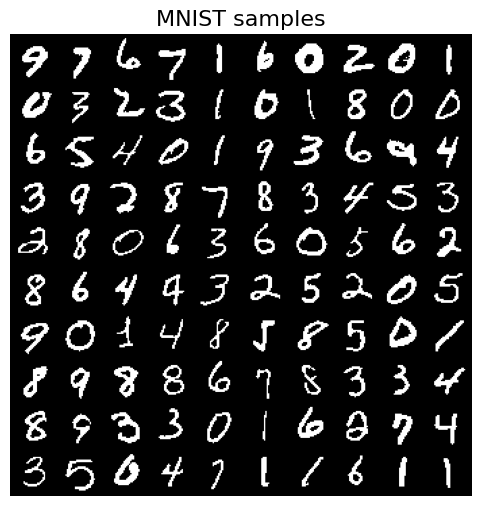

In [4]:
train_data, test_data = load_dataset("mnist", flatten=False, binarize=True)
visualize_images(train_data.astype(float), "MNIST samples")

Please note that our data is **discrete**, and, moreover, it is **binary**.

For this task, the neural networks $s(\cdot)$ and $t(\cdot)$ will be implemented using a ViT-like (Vision Transformer) architecture.

You may either implement the ViT yourself or use the version provided in [this repository](https://github.com/shub-garg/Vision-Transformer-VIT-for-MNIST/tree/main).

If you find it useful, consider giving the repository a star!

  

Implement a class ViTEncoder that takes images as input and produces embeddings for each patch.

These patch embeddings will then be passed to the ViTAffineConditioner, which reconstructs the functions $s(\cdot)$ and $t(\cdot)$ from them.

In [5]:
def pair(t):
    return t if isinstance(t, tuple) else (t, t)


class PreNorm(nn.Module):
    def __init__(self, dim: int, fn: nn.Module) -> None:
        super().__init__()
        self.norm = nn.LayerNorm(dim)
        self.fn = fn

    def forward(self, x: torch.Tensor, **kwargs) -> torch.Tensor:
        return self.fn(self.norm(x), **kwargs)


class FeedForward(nn.Module):
    def __init__(self, dim: int, hidden_dim: int, dropout: float = 0.0) -> None:
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(dim, hidden_dim),
            nn.ReLU(),  # nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, dim),
            nn.Dropout(dropout),
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.net(x)


class Attention(nn.Module):
    def __init__(
        self, dim: int, heads: int = 4, dim_head: int = 64, dropout: float = 0.0
    ) -> None:
        super().__init__()
        inner_dim = dim_head * heads
        project_out = not (heads == 1 and dim_head == dim)

        self.heads = heads
        self.scale = dim_head**-0.5

        self.attend = nn.Softmax(dim=-1)
        self.to_qkv = nn.Linear(dim, inner_dim * 3, bias=False)

        self.to_out = (
            nn.Sequential(nn.Linear(inner_dim, dim), nn.Dropout(dropout))
            if project_out
            else nn.Identity()
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        _, _, _, h = *x.shape, self.heads
        qkv = self.to_qkv(x).chunk(3, dim=-1)
        q, k, v = map(lambda t: rearrange(t, "b n (h d) -> b h n d", h=h), qkv)

        dots = einsum("b h i d, b h j d -> b h i j", q, k) * self.scale

        attn = self.attend(dots)

        out = einsum("b h i j, b h j d -> b h i d", attn, v)
        out = rearrange(out, "b h n d -> b n (h d)")
        return self.to_out(out)


class Transformer(nn.Module):
    def __init__(
        self,
        dim: int,
        depth: int,
        heads: int,
        dim_head: int,
        mlp_dim: int,
        dropout: float = 0.0,
    ) -> None:
        super().__init__()
        self.layers = nn.ModuleList([])
        for _ in range(depth):
            self.layers.append(
                nn.ModuleList(
                    [
                        PreNorm(
                            dim,
                            Attention(
                                dim, heads=heads, dim_head=dim_head, dropout=dropout
                            ),
                        ),
                        PreNorm(dim, FeedForward(dim, mlp_dim, dropout=dropout)),
                    ]
                )
            )

    def forward(self, x):
        for attn, ff in self.layers:
            x = attn(x) + x
            x = ff(x) + x
        return x


class ViTEncoder(nn.Module):
    def __init__(
        self,
        *,
        image_shape: tuple[int, int] | int,
        patch_shape: tuple[int, int] | int,
        dim: int,
        depth: int,
        heads: int,
        mlp_dim: int,
        n_channels: int = 3,
        dim_head: int = 64,
        dropout: float = 0.0,
        emb_dropout: float = 0.0,
    ) -> None:
        super().__init__()
        # ====
        # your code
        # 1) create embedder for patches
        # 2) create positional embedding
        # 3) create transformer
        # ====

        assert (
            image_shape[0] % patch_shape[0] == 0
            and image_shape[1] % patch_shape[1] == 0
        ), "Image dimensions must be divisible by the patch size."

        self.num_patches = (image_shape[0] // patch_shape[0]) * (
            image_shape[1] // patch_shape[1]
        )
        self.patch_shape = patch_shape
        self.n_channels = n_channels
        self.dim = dim
        
        self.to_patch_embedding = nn.Sequential(
            Rearrange(
                "b c (h p1) (w p2) -> b (h w) (p1 p2 c)",
                p1=patch_shape[0],
                p2=patch_shape[1],
            ),
            nn.Linear(n_channels * patch_shape[0] * patch_shape[1], dim),
        )


        self.positonal_embedding = nn.Embedding(self.num_patches, dim)
        self.transformer = Transformer(dim, depth, heads, dim_head, mlp_dim, dropout)
        self.dropout = nn.Dropout(emb_dropout)

    def forward(self, img: torch.Tensor) -> torch.Tensor:
        # ====
        # your code
        # 1) patch image and compute embeddings
        # 2) compute positional embeddings
        # 3) apply transformer and get representations for each patch
        # ====

        x = self.to_patch_embedding(img)

        b, n, _ = x.shape

        x += self.positonal_embedding(torch.arange(n, device=img.device))
        x = self.dropout(x)
        x = self.transformer(x)

        return x

Write `ViTAffineConditioner` that returns $s(\cdot)$ and $t(\cdot)$ after `ViTEncoder`.

In [6]:
class ViTAffineConditioner(nn.Module):
    def __init__(self, vit: ViTEncoder):
        super().__init__()
        # ====
        # your code
        # create heads for s and t

        self.vit = vit
        self.s_function = nn.Linear(
            vit.dim, vit.n_channels * vit.patch_shape[0] * vit.patch_shape[1]
        )
        self.t_function = nn.Linear(
            vit.dim, vit.n_channels * vit.patch_shape[0] * vit.patch_shape[1]
        )
        # ====

    def forward(self, img: torch.Tensor):
        # ====
        # your code
        # 1) Encode image into patch tokens via ViTEncoder
        # 2) Apply heads for s, t and reshape back into image

        x = self.vit(img)

        s = rearrange(
            self.s_function(x),
            "b (h w) (p1 p2 c) -> b c (h p1) (w p2) ",
            h=img.shape[2] // self.vit.patch_shape[0],
            w=img.shape[3] // self.vit.patch_shape[1],
            p1=self.vit.patch_shape[0],
            p2=self.vit.patch_shape[1],
            c=self.vit.n_channels,
        )

        t = rearrange(
            self.t_function(x),
            "b (h w) (p1 p2 c) -> b c (h p1) (w p2) ",
            h=img.shape[2] // self.vit.patch_shape[0],
            w=img.shape[3] // self.vit.patch_shape[1],
            p1=self.vit.patch_shape[0],
            p2=self.vit.patch_shape[1],
            c=self.vit.n_channels,
        )

        # ====

        return s, t

We have to implement coupling layer for images. To split image in two parts we will you **checkerboard** and **chanelwise** splitting (see image below).

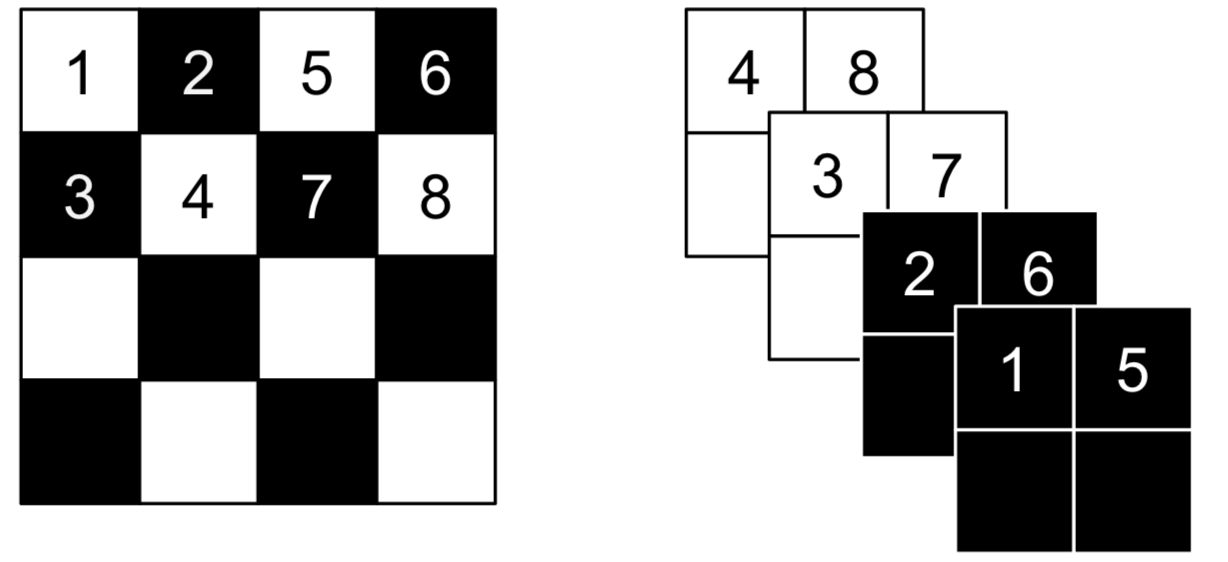

Firstly, let implement checkerboard splitting.

In [7]:
class AffineCheckerboardCouplingLayer(BaseModel):
    def __init__(
        self,
        parity_type: bool,
        image_shape: tuple[int, int],
        patch_shape: tuple[int, int] | int,
        dim: int = 128,
        depth: int = 2,
        heads: int = 4,
        mlp_dim: int = 256,
        n_channels: int = 1,
    ) -> None:
        super().__init__()
        assert isinstance(parity_type, bool)
        self.image_shape = image_shape
        self.parity_type = parity_type
        self.mask = self.build_mask()
        self.scale = nn.Parameter(torch.zeros(1))
        self.scale_shift = nn.Parameter(torch.zeros(1))

        # ====
        # your code
        # define ViTAffineConditioner that will output s() and t()

        self.vit = ViTEncoder(
            image_shape=image_shape,
            patch_shape=patch_shape,
            dim=dim,
            depth=depth,
            heads=heads,
            mlp_dim=mlp_dim,
            n_channels=n_channels,
        )

        self.vit_affine_conditioner = ViTAffineConditioner(self.vit)
        # ====

    def build_mask(self) -> torch.Tensor:
        # ====
        # your code
        # return checkerboard mask
        # if parity_type == True, the top left corner will be 1.0
        # if parity_type == False, the top left corner will be 0.0

        mask = np.zeros((1, 1, *self.image_shape), dtype=np.float32)
        if self.parity_type:
            mask[0, 0, 0::2, 0::2] = 1.0
            mask[0, 0, 1::2, 1::2] = 1.0
        else:
            mask[0, 0, 1::2, 0::2] = 1.0
            mask[0, 0, 0::2, 1::2] = 1.0

        # ====
        assert mask.shape[1:] == (1, *self.image_shape)
        return torch.tensor(mask.astype("float32"))

    def forward(self, x: torch.Tensor, invert: bool = False) -> tuple:
        batch_size = x.shape[0]
        mask = self.mask.repeat(batch_size, 1, 1, 1).to(self.device)

        # ====
        # your code
        # 1) mask tensor x
        # 2) apply ViTAffineConditioner to masked x to get s and t

        s, t = self.vit_affine_conditioner(x * mask)

        # ====
        # this formula is described in Section 4.1 in original paper
        # just left it unchanged
        s = self.scale * torch.tanh(s) + self.scale_shift
        t = t * (1.0 - mask)
        s = s * (1.0 - mask)

        # ====
        # your code
        # apply forward (invert=False) or inverse (invert=True) transform

        if invert:
            x = (x - t) * torch.exp(-s)
        else:
            x = x * torch.exp(s) + t

        # ====
        return x, s

In [8]:
def test_affine_checkerboard_coupling_layer(device: str = DEVICE):
    device = device or ("cuda" if torch.cuda.is_available() else "cpu")
    torch.manual_seed(0)

    x = torch.zeros((1, 1, 2, 2), dtype=torch.float32, device=device)

    for parity, mask_pattern in zip(
        [True, False],
        [[[1, 0], [0, 1]], [[0, 1], [1, 0]]],
    ):
        layer = AffineCheckerboardCouplingLayer(
            parity_type=parity,
            image_shape=(2, 2),
            patch_shape=(1, 1),
            dim=16,
            mlp_dim=32,
            n_channels=1,
        ).to(device)

        y, s = layer(x)

        # Shape checks
        assert y.shape == s.shape == (1, 1, 2, 2)

        # Mask consistency
        mask = torch.tensor(mask_pattern, dtype=torch.float32, device=device)
        assert torch.allclose(
            y[0, 0] * mask, torch.zeros_like(mask), atol=1e-6
        ), f"Masked positions should remain unchanged for parity={parity}"
        assert torch.allclose(s, torch.zeros_like(s), atol=1e-6), "Scale output should be zero-initialized"

    print("test_affine_checkerboard_coupling_layer passed!")


# Run the test
test_affine_checkerboard_coupling_layer()

test_affine_checkerboard_coupling_layer passed!


Secodly, let implement channelwise splitting.

In [9]:
class AffineChannelCouplingLayer(nn.Module):
    def __init__(
        self,
        parity_type: bool,
        image_shape: tuple[int, int] | int,
        patch_shape: tuple[int, int] | int,
        dim: int = 128,
        depth: int = 2,
        heads: int = 4,
        mlp_dim: int = 256,
        n_channels: int = 2,
    ) -> None:
        assert isinstance(parity_type, bool)
        super().__init__()
        self.parity_type = parity_type
        self.scale = nn.Parameter(torch.zeros(1), requires_grad=True)
        self.scale_shift = nn.Parameter(torch.zeros(1), requires_grad=True)
        # ====
        # your code
        # define ViTAffineConditioner that will output s() and t()

        self.vit = ViTEncoder(
            image_shape=image_shape,
            patch_shape=patch_shape,
            dim=dim,
            depth=depth,
            heads=heads,
            mlp_dim=mlp_dim,
            n_channels=n_channels,
        )

        self.vit_affine_conditioner = ViTAffineConditioner(self.vit)

        # ====

    def forward(self, x: torch.Tensor, invert: bool = False) -> torch.Tensor:
        n_channels = x.shape[1]

        # ====
        # your code
        # 1) split x to two equal parts by channel dimension (dim=1)
        # 2) apply ViTAffineConditioner to masked x

        z, z_split = torch.split(x, [n_channels // 2, n_channels // 2], dim=1)

        if not self.parity_type:
            z, z_split = z_split, z

        s, t = self.vit_affine_conditioner(z_split)

        # ====

        # this formula is described in Section 4.1 in original paper
        # just left it unchanged
        s = self.scale * torch.tanh(s) + self.scale_shift

        # ====
        # your code
        # apply forward (invert=False) or inverse (invert=True) transform

        if invert:
            z = (z - t) * torch.exp(-s)
        else:
            z = z * torch.exp(s) + t
        # ====

        # look carefully at this piece of code
        if self.parity_type:
            z = torch.cat([z, z_split], dim=1)
            s = torch.cat([s, torch.zeros_like(s)], dim=1)
        else:
            z = torch.cat([z_split, z], dim=1)
            s = torch.cat([torch.zeros_like(s), s], dim=1)
        return z, s

In [10]:
def test_affine_channel_coupling_layer(device: str = DEVICE):
    torch.manual_seed(0)

    # Small dummy input
    x = torch.zeros((1, 4, 2, 2), dtype=torch.float32, device=device)

    # Two parity configurations
    for parity, mask_pattern in zip(
        [True, False],
        [
            # parity=True => last 2 channels active
            np.array(
                [[[0, 0], [0, 0]], [[0, 0], [0, 0]], [[1, 1], [1, 1]], [[1, 1], [1, 1]]],
                dtype=np.float32,
            ),
            # parity=False => first 2 channels active
            np.array(
                [[[1, 1], [1, 1]], [[1, 1], [1, 1]], [[0, 0], [0, 0]], [[0, 0], [0, 0]]],
                dtype=np.float32,
            ),
        ],
    ):
        layer = AffineChannelCouplingLayer(
            parity_type=parity,
            image_shape=(2, 2),
            patch_shape=(1, 1),
            dim=16,
            mlp_dim=32,
            n_channels=2,
        ).to(device)

        y, s = layer(x)

        # Shape checks
        assert y.shape == s.shape == (1, 4, 2, 2), f"Unexpected output shape for parity={parity}"

        # Mask checks
        mask = torch.tensor(mask_pattern, dtype=torch.float32, device=device)
        masked_y = y[0] * mask
        assert torch.allclose(
            masked_y, torch.zeros_like(masked_y), atol=1e-6
        ), f"Masked positions should remain unchanged for parity={parity}"
        assert torch.allclose(
            s, torch.zeros_like(s), atol=1e-6
        ), f"Scale output should be zero-initialized for parity={parity}"

    print("test_affine_channel_coupling_layer passed!")


test_affine_channel_coupling_layer()

test_affine_channel_coupling_layer passed!


We will use the following normalization layer for more stable training. Look carefully at the class below (do not chage it).

In [11]:
class ActNormLayer(nn.Module):
    def __init__(self, n_channels: int) -> None:
        super().__init__()
        self.log_scale = nn.Parameter(torch.zeros(1, n_channels, 1, 1), requires_grad=True)
        self.shift = nn.Parameter(torch.zeros(1, n_channels, 1, 1), requires_grad=True)
        self.n_channels = n_channels
        self.initialized = False

    def forward(self, x: torch.Tensor, invert: bool = False) -> torch.Tensor:
        if invert:
            return (x - self.shift) * torch.exp(-self.log_scale), self.log_scale
        else:
            if not self.initialized:
                self.shift.data = -torch.mean(x, dim=[0, 2, 3], keepdim=True)
                self.log_scale.data = -torch.log(
                    torch.std(x.permute(1, 0, 2, 3).reshape(self.n_channels, -1), dim=1).reshape(
                        1, self.n_channels, 1, 1
                    )
                )
                self.initialized = True
            return x * torch.exp(self.log_scale) + self.shift, self.log_scale

Our data is discrete. The normalizing flow model works with continuous data (it is a requirement of CoV theorem).

Therefore, we have to convert our discrete data to continuous one. This process is called **dequantization**. We will discuss it later in lectures.

To dequantize the discrete variable $x \in \{0, 1, \dots, K - 1\}$ we add uniform noise to it:
$$
    y = x + u, \quad u \sim \text{Uniform}[0, 1].
$$

Then random variable $y \in [0, K]$ will be continuous and in fact similar to $x$.

Let implement simple function for such dequantization.

In [12]:
def dequantize(x: torch.Tensor, nbins: int = 256) -> torch.Tensor:
    return (x * (nbins - 1) + torch.distributions.Uniform(0.0, 1.0).sample(x.shape).to(x.device)) / nbins


def test_dequantize():
    x = torch.tensor((0, 1, 2, 3)) / 256.0
    y = dequantize(x).cpu().detach().numpy()
    x = x.cpu().detach().numpy()
    assert y.min() >= 0.0
    assert y.max() <= 4 / 256.0
    assert (y[3] > y[2]) and (y[2] > y[1]) and (y[1] > y[0])
    assert (y[3] > x[3]) and (y[2] > x[2]) and (y[1] > x[1]) and (y[0] > x[0])


test_dequantize()

The second issue that we will address here is the boundedness of the image domain. It is more natural for the model to fit the data from the range $(-\infty, +\infty)$.

The most natural way to convert $(-\infty, +\infty)$ range to the $[0, 1]$ is to apply sigmoid function. But here we need the inverse transform from [0, 1] range (it is normalized dequantized images) to $(-\infty, +\infty)$. So we need to apply inverse sigmoid function. This function is called logit:
$$
    \text{logit}(x) = \log \left( \frac{x}{1 - x} \right) = \log (x) - \log (1 - x).
$$

The last note here is the stability of this transform. To make it stable the common practice is to convert [0, 1] range to the $[\alpha, 1 - \alpha]$ firstly (where $\alpha$ is a small constant):
$$
    \text{logit}(x) = \log (y) - \log (1 - y), \quad \text{where } y = \alpha + (1 - 2 * \alpha) * x.
$$

Also we need the logarithm of the Jacobian' determinant for this transform. We implement this for you, but we really encourage you to check that the formula in the code is correct for better understanding.

In [13]:
class LogitTransform(nn.Module):
    def __init__(self, alpha: float = 0.05, dequantize: bool = True, nbins: int = 256) -> None:
        super().__init__()
        self.alpha = alpha
        self.dequantize = dequantize
        self.nbins = nbins

    def forward(self, x: torch.Tensor, invert: bool = False) -> tuple:
        if invert:
            log_det = -x - 2 * F.softplus(-x) - torch.log(torch.tensor(1 - 2 * self.alpha))
            x = (torch.sigmoid(x) - self.alpha) / (1 - 2 * self.alpha)
        else:
            # dequantization
            if self.dequantize:
                x = dequantize(x, nbins=self.nbins)

            # ====
            # your code
            # 1) scale the data to [alpha, 1 - alpha range] (save the result to x_scaled)
            # 2) apply logit operation that described above (save the result to x)

            x_scaled = self.alpha + (1-2*self.alpha) * x
            x = torch.log(x_scaled / (1 - x_scaled))

            # ====

            # look carefully at this expression, try to understand this formula
            log_det = -torch.log(x_scaled) - torch.log(1.0 - x_scaled) + torch.log(torch.tensor(1 - 2 * self.alpha))
        return x, log_det


def test_logit_transform():
    layer = LogitTransform(dequantize=False)
    x = torch.tensor((0, 1, 2, 3)) / 256.0
    z, log_det = layer(x)
    assert np.allclose(
        z.cpu().detach().numpy(),
        np.array([-2.944439, -2.8727808, -2.8054335, -2.7418802]),
    )
    assert np.allclose(
        log_det.cpu().detach().numpy(),
        np.array([2.9416652, 2.8774219, 2.8175175, 2.7614343]),
    )

    x_restored, _ = layer(z, invert=True)
    assert np.allclose(x.cpu().detach().numpy(), x_restored.cpu().detach().numpy())


test_logit_transform()

Not it is time to define the final model.

The model will consist of several blocks:

1. Logit Transform (to convert the data to $(-\infty, \infty)$ range).
2. Stack of checkerboard coupling layers.
3. Squeeze operation (convert tensor $[B, C, H, W]$ to $[B, 4 * C, H / 2, W / 2]$).
4. Stack of channelwise coupling layers
5. Unsqueeze operation (convert tensor $[B, C, H, W]$ to $[B, C / 4, 2 * H, 2 * W]$).
2. Stack of checkerboard coupling layers.

In [14]:
class RealNVP(BaseModel):
    def __init__(
        self,
        image_shape: tuple[int, int],
        patch_shape: tuple[int, int],
        dim: int = 128,
        depth: int = 2,
        heads: int = 4,
        mlp_dim: int = 256,
        n_channels: int = 1,
        nbins: int = 256,
    ) -> None:
        super().__init__()
        self.image_shape = image_shape
        self.n_channels = n_channels
        self.nbins = nbins

        self.prior = torch.distributions.Normal(
            loc=torch.tensor(0.0), scale=torch.tensor(1.0)
        )
        self.logit_transform = LogitTransform(nbins=nbins, dequantize=True)

        # ====
        # your code
        # define stack of checkerboard coupling layers with alternating parity_type
        # add ActNormLayer after each coupling layer

        self.transforms1 = nn.ModuleList()
        for i in range(4):
            self.transforms1.append(
                AffineCheckerboardCouplingLayer(
                    i % 2 == 1,
                    image_shape,
                    patch_shape,
                    dim,
                    depth,
                    heads,
                    mlp_dim,
                    n_channels,
                )
            )
            self.transforms1.append(ActNormLayer(n_channels))

        # ====

        # ====
        # your code
        # define stack of channel coupling layers with alternating parity_type
        # add ActNormLayer after each coupling layer
        # Hint: do not forget about changed image shape

        class Printer(nn.Module):
            def __init__(self, message):
                super().__init__()
                self.message = message

            def forward(self, x):
                print(self.message)
                return x, 0

        self.transforms2 = nn.ModuleList()
        for i in range(4):

            # self.transforms2.append(Printer("start"))

            self.transforms2.append(
                AffineChannelCouplingLayer(
                    i % 2 == 1,
                    [x // 2 for x in image_shape],
                    patch_shape,
                    dim,
                    depth,
                    heads,
                    mlp_dim,
                    n_channels * 2,
                )
            )

            # self.transforms2.append(Printer("Completed Affine"))

            self.transforms2.append(ActNormLayer(n_channels * 4))

            # self.transforms2.append(Printer("End"))

        # ====

        # ====
        # your code
        # define stack of checkerboard coupling layers with alternating parity_type
        # add ActNormLayer after each coupling layer

        self.transforms3 = nn.ModuleList()
        for i in range(4):
            self.transforms3.append(
                AffineCheckerboardCouplingLayer(
                    i % 2 == 1,
                    image_shape,
                    patch_shape,
                    dim,
                    depth,
                    heads,
                    mlp_dim,
                    n_channels,
                )
            )
            self.transforms3.append(ActNormLayer(n_channels))
        # ====

    def squeeze(self, x: torch.Tensor) -> torch.Tensor:
        # Look carefully at this piece of code (do not change)
        [B, C, H, W] = list(x.size())
        x = x.reshape(B, C, H // 2, 2, W // 2, 2)
        x = x.permute(0, 1, 3, 5, 2, 4)
        x = x.reshape(B, C * 4, H // 2, W // 2)
        return x

    def undo_squeeze(self, x: torch.Tensor) -> torch.Tensor:
        # Look carefully at this piece of code (do not change)
        [B, C, H, W] = list(x.size())
        x = x.reshape(B, C // 4, 2, 2, H, W)
        x = x.permute(0, 1, 4, 2, 5, 3)
        x = x.reshape(B, C // 4, H * 2, W * 2)
        return x

    def forward(self, x: torch.Tensor, invert: bool = False) -> tuple:
        z = x
        log_det = torch.zeros_like(x, dtype=float)
        if invert:
            for op in reversed(self.transforms3):
                z, delta_log_det = op.forward(z, invert=True)
                log_det += delta_log_det
            z, log_det = self.squeeze(z), self.squeeze(log_det)
            for op in reversed(self.transforms2):
                z, delta_log_det = op.forward(z, invert=True)
                log_det += delta_log_det
            z, log_det = self.undo_squeeze(z), self.undo_squeeze(log_det)
            for op in reversed(self.transforms1):
                z, delta_log_det = op.forward(z, invert=True)
                log_det += delta_log_det
            z, delta_log_det = self.logit_transform(z, invert=True)
            log_det += delta_log_det
        else:
            z, delta_log_det = self.logit_transform(z)
            log_det += delta_log_det
            for op in self.transforms1:
                z, delta_log_det = op.forward(z)
                log_det += delta_log_det
            z, log_det = self.squeeze(z), self.squeeze(log_det)
            for op in self.transforms2:
                z, delta_log_det = op.forward(z)
                log_det += delta_log_det
            z, log_det = self.undo_squeeze(z), self.undo_squeeze(log_det)
            for op in self.transforms3:
                z, delta_log_det = op.forward(z)
                log_det += delta_log_det
        return z, log_det

    def log_prob(self, x: torch.Tensor) -> torch.Tensor:
        self.prior.loc = self.prior.loc.to(self.device)
        self.prior.scale = self.prior.scale.to(self.device)
        # ====
        # your code
        # 1) make forward pass with right inverse flag
        # 2) sum log_det with log of base distribution (log p(z))
        # 3) we will get tensor of shape [batch_size, 3, H, W] - sum it over the the last 3 dimensions

        z, log_det = self.forward(x, invert=False)

        log_prob = self.prior.log_prob(z).sum(dim=[1, 2, 3]) + log_det.sum(
            dim=[1, 2, 3]
        )

        # ====
        return log_prob

    def loss(self, x: torch.Tensor) -> dict:
        return {"nll_loss": -self.log_prob(x).mean()}

    def sample(self, num_samples: int) -> np.ndarray:
        self.prior.loc = self.prior.loc.to(self.device)
        self.prior.scale = self.prior.scale.to(self.device)
        # Look carefully at this piece of code (do not change)
        z = self.prior.sample([num_samples, self.n_channels, *self.image_shape])
        samples = self.forward(z, invert=True)[0]
        samples = samples.cpu().detach().numpy()
        samples = np.floor(np.clip(samples * self.nbins, 0.0, self.nbins - 1)) / (
            self.nbins - 1
        )
        return samples

In [15]:
# ====
# your code
# choose these parameters
BATCH_SIZE = 512
LR = 1e-3
DIM = 128
DEPTH = 4
HEADS = 4
MLP_DIM = 256
# ====

# model
model = RealNVP(
    image_shape=(32, 32),
    patch_shape=(8, 8),
    dim=DIM,
    depth=DEPTH,
    heads=HEADS,
    mlp_dim=MLP_DIM,
    n_channels=1,
    nbins=2,
)

Let train this model :)

The model can be challenging to train, so don't be discouraged by poor initial samples. For better results, train the model for more than an hour.

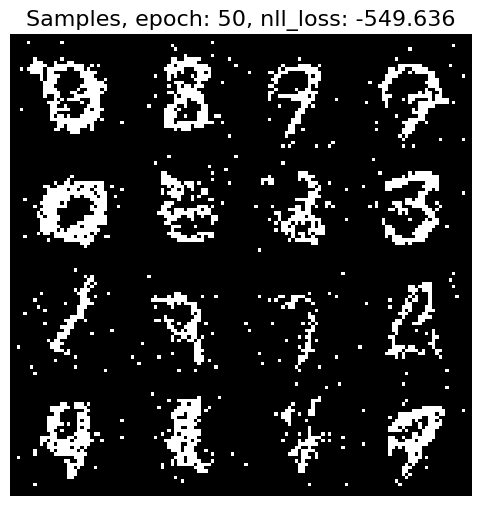

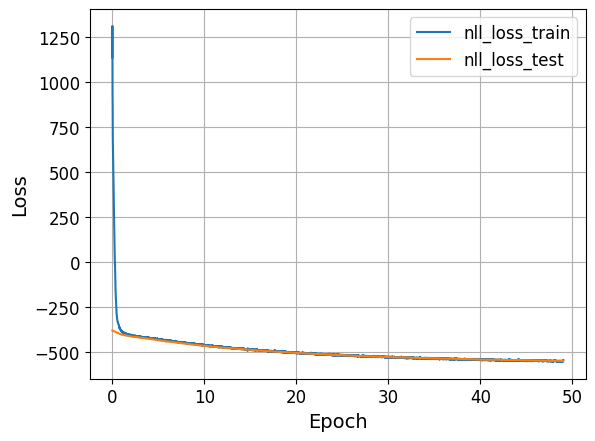

End of the training


In [ ]:
loader_args = dict(batch_size=BATCH_SIZE, shuffle=True)
train_loader = data.DataLoader(train_data, **loader_args)
test_loader = data.DataLoader(test_data, **loader_args)

# ====
# your code
# choose any optimizer/scheduler as you want
optimizer = torch.optim.Adam(model.parameters(), lr=LR)
# ====

# train
EPOCHS = 50

train_model(
    model,
    train_loader,
    test_loader,
    epochs=EPOCHS,
    optimizer=optimizer,
    device=DEVICE,
    n_samples=16,
    visualize_samples=True,
    loss_key="nll_loss",
)

## Task 3: ViTVAE on CIFAR10 data (5pt)

In this task you will implement VAE model for CIFAR10 dataset.

Let download and visualize samples from the dataset.

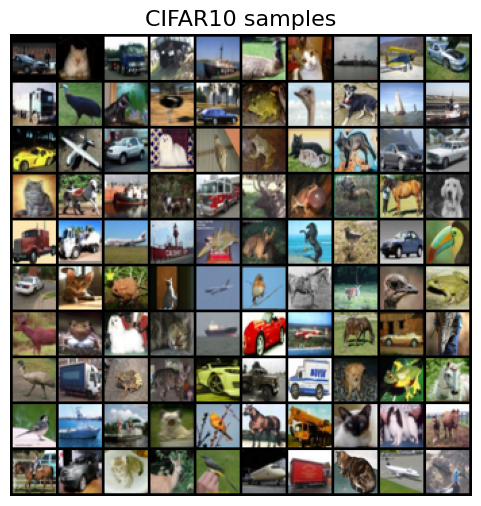

In [16]:
train_data, test_data = load_dataset("cifar10", flatten=False, binarize=False)
visualize_images(train_data, "CIFAR10 samples")

Now it is time to define our model. Our model will have the following structure:

* Prior distribution is standard Normal ($p(\mathbf{z}) = \mathcal{N}(0, I)$).
* Variational posterior distribution (or encoder) is $q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi}) = \mathcal{N}(\boldsymbol{\mu}_{\boldsymbol{\phi}}(\mathbf{x}), \boldsymbol{\Sigma}_{\boldsymbol{\phi}}(\mathbf{x}))$. Here $\boldsymbol{\phi}$ denotes all parameters of the encoder neural network. We will assume that covariance matrice $\boldsymbol{\Sigma}_{\boldsymbol{\phi}}(\mathbf{x})$ is diagonal.
* Generative distribution (or decoder) is $p(\mathbf{x} | \mathbf{z}, \boldsymbol{\theta}) = \mathcal{N}(\boldsymbol{\mu}_{\boldsymbol{\theta}}(\mathbf{z}), \boldsymbol{\Sigma}_{\boldsymbol{\theta}}(\mathbf{z}))$. Here $\boldsymbol{\theta}$ denotes all parameters of the decoder neural network. Please note, that here we will use continuous distribution for our variables $\mathbf{x}$.
* We do not fit the covariance matrix $\boldsymbol{\Sigma}_{\boldsymbol{\theta}}(\mathbf{z})$ in the generative distribution $p(\mathbf{x} | \mathbf{z}, \boldsymbol{\theta})$. We assume that it is identical ($\boldsymbol{\Sigma}_{\boldsymbol{\theta}}(\mathbf{z}) = \mathbf{I}$). We will use the $\boldsymbol{\mu}_{\boldsymbol{\theta}}(\mathbf{z})$ (mean of the generative distribution $p(\mathbf{x} | \mathbf{z}, \boldsymbol{\theta})$) as model samples.
* Our encoder and decoder will be convolutional neural networks.
* Model objective is slightly modified ELBO:
$$
    \mathcal{L}(\boldsymbol{\phi}, \boldsymbol{\theta}) = \mathbb{E}_{q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi})} \log p(\mathbf{x} | \mathbf{z}, \boldsymbol{\theta}) - \beta * KL (q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi}) || p(\mathbf{z})).
$$
Here we introduce the parameter $\beta$. It reweights KL term in the total loss. It a standard heuristics that allows to get more accurate model. In this exercise you have to play with it, starting with the value $\beta = 1$ (standard ELBO).

To make the expectation is independent of parameters $\boldsymbol{\phi}$, we will use reparametrization trick.


To calculate the loss, we should derive
- $\log p(\mathbf{x} | \mathbf{z}, \boldsymbol{\theta})$, note that generative distribution is $\mathcal{N}(\boldsymbol{\mu}_{\boldsymbol{\theta}}(\mathbf{z}), \boldsymbol{\Sigma}_{\boldsymbol{\theta}}(\mathbf{z}))$.
- KL between $q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi}) = \mathcal{N}(\boldsymbol{\mu}_{\boldsymbol{\phi}}(\mathbf{x}), \boldsymbol{\Sigma}_{\boldsymbol{\phi}}(\mathbf{x}))$ and $\mathcal{N}(0, \mathbf{I})$.

Let start with the helper functions.

In [17]:
from typing import Optional


def get_normal_KL(
    mean_1: torch.Tensor,
    log_std_1: torch.Tensor,
    mean_2: Optional[torch.Tensor] = None,
    log_std_2: Optional[torch.Tensor] = None,
) -> torch.Tensor:
    """
    :Parameters:
    mean_1: means of normal distributions (1)
    log_std_1 : standard deviations of normal distributions (1)
    mean_2: means of normal distributions (2)
    log_std_2 : standard deviations of normal distributions (2)
    :Outputs:
    kl divergence of the normal distributions (1) and normal distributions (2)
    ---
    This function should return the value of KL(p1 || p2),
    where p1 = Normal(mean_1, exp(log_std_1) ** 2), p2 = Normal(mean_2, exp(log_std_2) ** 2).
    If mean_2 and log_std_2 are None values, we will use standard normal distribution.
    Note that we consider the case of diagonal covariance matrix.
    """
    if mean_2 is None:
        mean_2 = torch.zeros_like(mean_1)
    if log_std_2 is None:
        log_std_2 = torch.zeros_like(log_std_1)
    assert mean_1.shape == log_std_1.shape == mean_2.shape == log_std_2.shape
    # ====
    # your code

    std1 = torch.exp(log_std_1)
    std2 = torch.exp(log_std_2)

    return (
        (mean_2 - mean_1) ** 2 / std2**2
        + std1**2 / std2**2
        - 2 * log_std_1
        + 2 * log_std_2
        - 1
    ) / 2

    # ====


def test_KL():
    assert np.isclose(
        get_normal_KL(
            torch.tensor(2), torch.tensor(3), torch.tensor(0), torch.tensor(0)
        ).numpy(),
        200.2144,
        rtol=1e-3,
    )
    assert np.isclose(
        get_normal_KL(
            torch.tensor(2), torch.tensor(3), torch.tensor(4), torch.tensor(5)
        ).numpy(),
        1.50925,
        rtol=1e-3,
    )
    assert np.allclose(
        get_normal_KL(
            torch.tensor((10, 10)), torch.tensor((2, 4)), torch.tensor((3, 5))
        ).numpy(),
        [49.2990, 1498.479],
        rtol=1e-3,
    )


test_KL()

In [18]:
def get_normal_nll(x: torch.Tensor, mean: torch.Tensor, log_std: torch.Tensor) -> torch.Tensor:
    """
    This function should return the negative log likelihood log p(x),
    where p(x) = Normal(x | mean, exp(log_std) ** 2).
    Note that we consider the case of diagonal covariance matrix.
    """
    # ====
    # your code

    std = torch.exp(log_std)
    return 0.5 * (x - mean) ** 2 / std**2 + 0.5 * torch.log(torch.tensor(2) * torch.pi) + log_std

    # ====


def test_NLL():
    assert np.isclose(
        get_normal_nll(torch.tensor(2), torch.tensor(2), torch.tensor(3)).numpy(),
        3.9189,
        rtol=1e-3,
    )
    assert np.isclose(
        get_normal_nll(torch.tensor(5), torch.tensor(-3), torch.tensor(6)).numpy(),
        6.9191,
        rtol=1e-3,
    )
    assert np.allclose(
        get_normal_nll(torch.tensor((10, 10)), torch.tensor((2, 4)), torch.tensor((3, 5))).numpy(),
        np.array([3.9982, 5.9197]),
        rtol=1e-3,
    )


test_NLL()

Let define our encoder and decoder neural networks. We will use ViT-like encoder and decoder.. `ViTEncoderVAE` closely resembles `ViTAffineConditioner`; however, it returns the mean $\mu$ and log-variance $\log\sigma$ rather than $s$ and $t$.

I want to add cls token

In [19]:
class ViTEncoder(nn.Module):
    def __init__(
        self,
        *,
        image_shape: tuple[int, int] | int,
        patch_shape: tuple[int, int] | int,
        dim: int,
        depth: int,
        heads: int,
        mlp_dim: int,
        n_channels: int = 3,
        dim_head: int = 64,
        dropout: float = 0.0,
        emb_dropout: float = 0.0,
    ) -> None:
        super().__init__()
        # ====
        # your code
        # 1) create embedder for patches
        # 2) create positional embedding
        # 3) create transformer
        # ====

        assert (
            image_shape[0] % patch_shape[0] == 0
            and image_shape[1] % patch_shape[1] == 0
        ), "Image dimensions must be divisible by the patch size."

        self.num_patches = (image_shape[0] // patch_shape[0]) * (
            image_shape[1] // patch_shape[1]
        )
        self.patch_shape = patch_shape
        self.n_channels = n_channels
        self.dim = dim

        self.to_patch_embedding = nn.Sequential(
            Rearrange(
                "b c (h p1) (w p2) -> b (h w) (p1 p2 c)",
                p1=patch_shape[0],
                p2=patch_shape[1],
            ),
            nn.Linear(n_channels * patch_shape[0] * patch_shape[1], dim),
        )

        self.cls_token = nn.Parameter(torch.randn(1, 1, dim))
        self.positonal_embedding = nn.Embedding(self.num_patches + 1, dim)
        self.transformer = Transformer(dim, depth, heads, dim_head, mlp_dim, dropout)
        self.dropout = nn.Dropout(emb_dropout)

    def forward(self, img: torch.Tensor) -> torch.Tensor:
        # ====
        # your code
        # 1) patch image and compute embeddings
        # 2) compute positional embeddings
        # 3) apply transformer and get representations for each patch
        # ====

        x = self.to_patch_embedding(img)

        b, n, _ = x.shape

        cls_tokens = self.cls_token.repeat(b, 1, 1)
        x = torch.cat((cls_tokens, x), dim=1)

        x += self.positonal_embedding(torch.arange(n + 1, device=img.device))
        x = self.dropout(x)
        x = self.transformer(x)

        return x

In [ ]:
class ViTEncoderVAE(nn.Module):
    def __init__(self, vit: ViTEncoder, latent_dim: int) -> None:
        super().__init__()
        # ====
        # your code
        # create neural network that transforms patch embeddings from ViTEncoder to mu and log_std

        self.vit = vit
        self.norm = nn.LayerNorm(vit.dim)
        self.mu = nn.Linear(vit.dim, latent_dim)
        self.log_std = nn.Linear(vit.dim, latent_dim)

        # ====

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # ====
        # your code
        # 1) Get embeddings per patch via ViTEncoder
        # 2) Compute mu and logvar

        x = self.vit(x)[:, 0]
        x = self.norm(x)

        mu = self.mu(x)
        log_std = self.log_std(x)
        # ====
        return mu, log_std

Look at this piece of code carefully.

In [22]:
class ViTDecoderVAE(nn.Module):
    def __init__(
        self,
        *,
        image_shape: tuple[int, int] | int,
        patch_shape: tuple[int, int] | int,
        dim: int,
        depth: int,
        heads: int,
        mlp_dim: int,
        n_channels: int = 3,
        dim_head: int = 64,
        dropout: float = 0.0,
        emb_dropout: float = 0.0,
    ) -> None:
        super().__init__()
        image_height, image_width = pair(image_shape)
        patch_height, patch_width = pair(patch_shape)

        assert (
            image_height % patch_height == 0 and image_width % patch_width == 0
        ), "Image dimensions must be divisible by the patch size."

        self.num_patches = (image_height // patch_height) * (image_width // patch_width)
        self.patch_height, self.patch_width = patch_height, patch_width
        self.n_channels = n_channels
        self.image_height = image_height
        self.image_width = image_width
        self.dim = dim

        # Expand latent vector into patch tokens
        self.latent_to_tokens = nn.Linear(dim, self.num_patches * dim)
        self.pos_embedding = nn.Parameter(torch.randn(1, self.num_patches, dim))
        self.dropout = nn.Dropout(emb_dropout)

        self.transformer = Transformer(dim, depth, heads, dim_head, mlp_dim, dropout)

        # Project patch embeddings back to pixels
        patch_dim = n_channels * patch_height * patch_width
        self.to_pixels = nn.Linear(dim, patch_dim)

    def forward(self, z: torch.Tensor) -> torch.Tensor:
        b, _ = z.shape
        # Expand single latent into sequence of tokens
        x = self.latent_to_tokens(z).reshape(b, self.num_patches, self.dim)
        x += self.pos_embedding
        x = self.dropout(x)

        x = self.transformer(x)

        # project tokens back to patches
        patches = self.to_pixels(x)

        # reconstruct image
        img = rearrange(
            patches,
            "b (h w) (p1 p2 c) -> b c (h p1) (w p2)",
            h=self.image_height // self.patch_height,
            w=self.image_width // self.patch_width,
            p1=self.patch_height,
            p2=self.patch_width,
            c=self.n_channels,
        )
        return img

We are ready to implement VAE model for image dataset.

In [23]:
class ViTVAE(BaseModel):
    def __init__(
        self,
        n_latent: int,
        encoder: ViTEncoderVAE,
        decoder: ViTDecoderVAE,
        beta: float = 1,
    ) -> None:
        super().__init__()

        self.n_latent = n_latent
        self.beta = beta

        self.encoder = encoder
        self.decoder = decoder

    def prior(self, n: int) -> torch.Tensor:
        # ====
        # your code
        # return n samples from prior distribution (we use standart normal for prior)
        # ====

        z = torch.randn(n, self.n_latent, device=self.device)
        z = z.to(self.device)
        return z

    def forward(self, x: torch.Tensor) -> tuple:
        # ====
        # your code
        # 1) apply encoder to get mu_z, log_std_z
        # 2) apply reparametrization trick (use self.prior)
        # 3) apply decoder to get mu_x (which corresponds to reconstructed x)

        mu_z, log_std_z = self.encoder(x)
        eps = self.prior(x.shape[0])
        z = eps * torch.exp(log_std_z) + mu_z
        x_recon = self.decoder(z)
        # ====
        return mu_z, log_std_z, x_recon

    def loss(self, x: torch.Tensor) -> dict:
        # ====
        # your code
        # 1) make forward step to get mu_z, log_std_z, x_recon
        # 2) calculate recon_loss (use get_normal_nll)
        # 3) calcucalte kl_loss (use get_normal_KL)

        mu_z, log_std_z, x_recon = self.forward(x)

        recon_loss = (
            get_normal_nll(x.flatten(1), x_recon.flatten(1), torch.tensor(0))
            .sum(1)
            .mean()
        )
        kl_loss = get_normal_KL(mu_z, log_std_z).sum(1).mean()

        # ====
        return {
            "elbo_loss": recon_loss + self.beta * kl_loss,
            "recon_loss": recon_loss,
            "kl_loss": kl_loss,
        }

    def sample(self, n: int) -> np.ndarray:
        with torch.no_grad():
            # ====
            # your code
            # 1) generate prior samples
            # 2) apply decoder

            z = self.prior(n)
            x_recon = self.decoder(z)
            # ====
            samples = torch.clamp(x_recon, -1, 1)
        return samples.cpu().numpy() * 0.5 + 0.5

That is all! We are ready to train our model.

In [41]:
# ====
# your code
# choose these parameters
BATCH_SIZE = 256
EPOCHS = 100
LR = 5e-4
N_LATENS = 256
BETA = 0.3
SCHEDULER_GAMMA = 0.995
# ====

# we center the data, because it helps the model to fit
centered_train_data = train_data * 2 - 1
centered_test_data = test_data * 2 - 1

train_loader = data.DataLoader(centered_train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = data.DataLoader(centered_test_data, batch_size=BATCH_SIZE)

In [42]:
DIM = 256
DEPTH = 8
HEADS = 4
MLP_DIM = 128

image_shape = (32, 32)
patch_shape = (4, 4)
vit = ViTEncoder(
    image_shape=image_shape,
    patch_shape=patch_shape,
    dim=DIM,
    depth=DEPTH,
    heads=HEADS,
    mlp_dim=MLP_DIM,
    n_channels=3,
)
vit_encoder_vae = ViTEncoderVAE(
    vit,
    N_LATENS,
)
vit_decoder_vae = ViTDecoderVAE(
    image_shape=image_shape,
    patch_shape=patch_shape,
    dim=N_LATENS,
    depth=DEPTH,
    heads=HEADS,
    mlp_dim=MLP_DIM,
    n_channels=3,
)

model = ViTVAE(N_LATENS, vit_encoder_vae, vit_decoder_vae, beta=BETA)

# choose any optimizer/scheduler as you want
optimizer = torch.optim.Adam(model.parameters(), lr=LR)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer=optimizer, gamma=SCHEDULER_GAMMA)

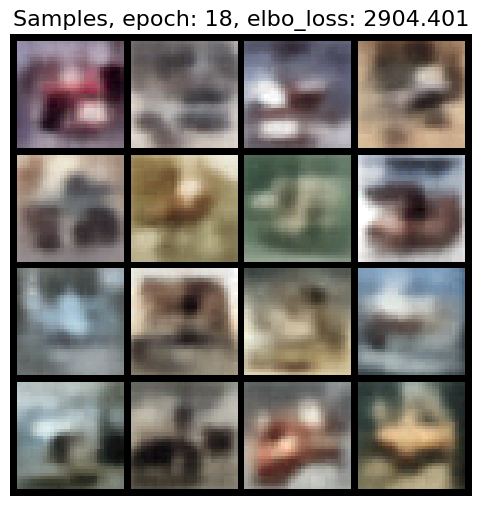

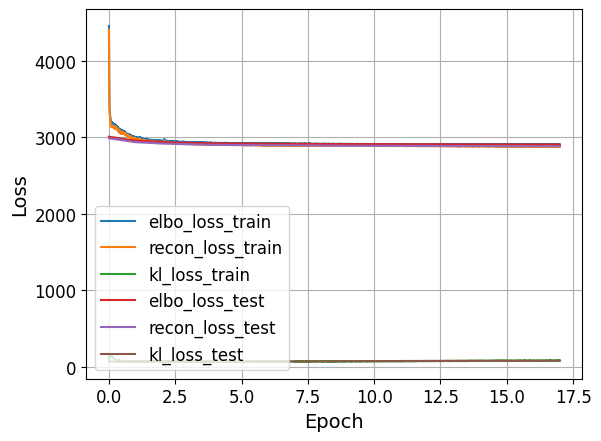

Training epoch 19:   0%|          | 0/196 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [43]:
train_model(
    model,
    train_loader,
    test_loader,
    epochs=EPOCHS,
    optimizer=optimizer,
    scheduler=scheduler,
    device=DEVICE,
    n_samples=16,
    visualize_samples=True,
    loss_key="elbo_loss",
)

Now we could visualize the model outputs.

1. We could sample new images from our model (sample latent variable from the prior and apply the decoder).
2. We could visualize image reconstructions (apply the encoder and the decoder to the fixed image).
3. Visualize interpolations (apply the encoder to two images $\mathbf{x}_1$ and $\mathbf{x}_2$ to obtain the latent variables $\mathbf{z}_1$ and $\mathbf{z}_2$, apply the decoder to the latent variables $\mathbf{z}$ lying on the segment between $\mathbf{z}_1$ and $\mathbf{z}_2$).

**Note:** it is ok that your samples are blurry. We do not use difficult architectures and do not tune hyperparameters carefully.

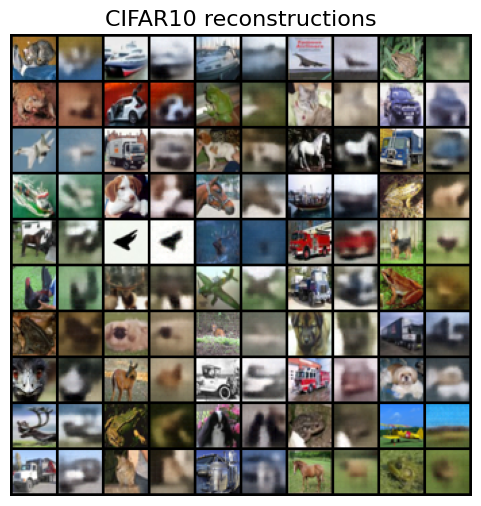

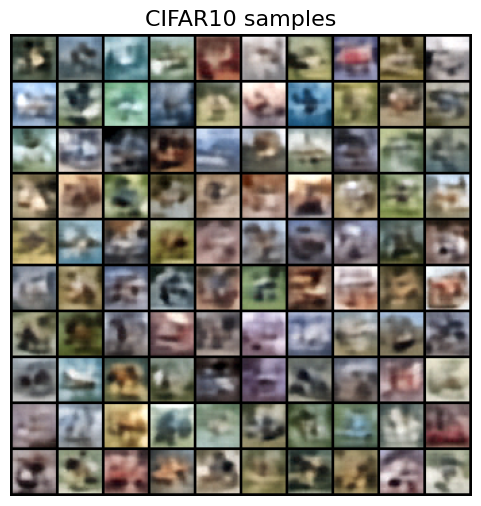

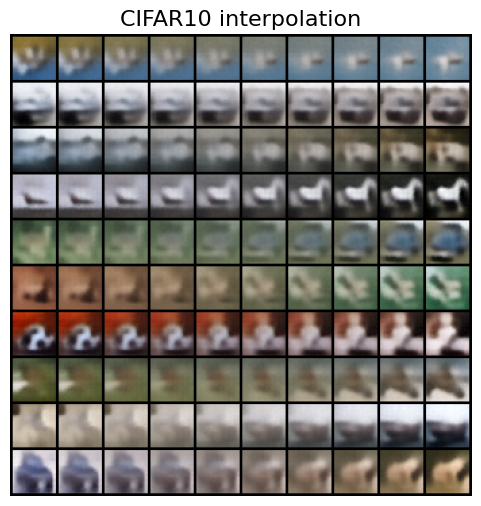

In [44]:
samples = model.sample(100)

x = next(iter(test_loader))[:50]

x = x.to(model.device)

with torch.no_grad():
    z, _ = model.encoder(x)
    x_recon = torch.clamp(model.decoder(z), -1, 1)
reconstructions = torch.stack((x, x_recon), dim=1).view(-1, 3, 32, 32) * 0.5 + 0.5
reconstructions = reconstructions.cpu().numpy()

x = next(iter(test_loader))[:20]
x = x.to(model.device)
with torch.no_grad():
    z, _ = model.encoder(x)
    z1, z2 = z.chunk(2, dim=0)
    interps = [model.decoder(z1 * (1 - alpha) + z2 * alpha) for alpha in np.linspace(0, 1, 10)]
    interps = torch.stack(interps, dim=1).view(-1, 3, 32, 32)
    interps = torch.clamp(interps, -1, 1) * 0.5 + 0.5
interps = interps.cpu().numpy()

show_samples(reconstructions, "CIFAR10 reconstructions")
show_samples(samples, "CIFAR10 samples")
show_samples(interps, "CIFAR10 interpolation")